In [17]:
# load necessary functions and set parameters

import os
import glob
import matplotlib.pyplot as plt

from fcns import *

Working_dir = '.'

paths_train = {
    "images": os.path.join(Working_dir, "example_data/images"),
    "heart": os.path.join(Working_dir, "example_data/heart"),
    "l_clavicle": os.path.join(Working_dir, "example_data/left clavicle"),
    "r_clavicle": os.path.join(Working_dir, "example_data/right clavicle"),
    "l_lung": os.path.join(Working_dir, "example_data/left lung"),
    "r_lung": os.path.join(Working_dir, "example_data/right lung")}

files = list(set(glob.glob(os.path.join(paths_train["images"],'JPC*'))) - \
             set(glob.glob(os.path.join(paths_train["images"],'*_*'))))
subjects = [(f.split('/')[-1]).split('.')[0] for f in files]

LOCS = ['heart', 'l_clavicle', 'r_clavicle', 'l_lung', 'r_lung']

In [19]:
# get substitution dataframe from example images
df = generate_df(paths_train, LOCS, subjects, save_path=None)

# or get the substitution dataframe from saved df, calculated based on all training images
train_df = pd.read_csv(os.path.join(Working_dir, "example_data/images"))
train_df = pd.read_csv(
    os.path.join(Working_dir, "example_data/kde_original_train.csv"),
    index_col=0)


Loading location: heart


100%|██████████| 5/5 [00:00<00:00, 16.82it/s]


Loading location: l_clavicle


100%|██████████| 5/5 [00:00<00:00, 17.74it/s]


Loading location: r_clavicle


100%|██████████| 5/5 [00:00<00:00, 17.77it/s]


Loading location: l_lung


100%|██████████| 5/5 [00:00<00:00, 16.93it/s]


Loading location: r_lung


100%|██████████| 5/5 [00:00<00:00, 16.83it/s]


Calculating KDE:


100%|██████████| 6/6 [00:22<00:00,  3.75s/it]


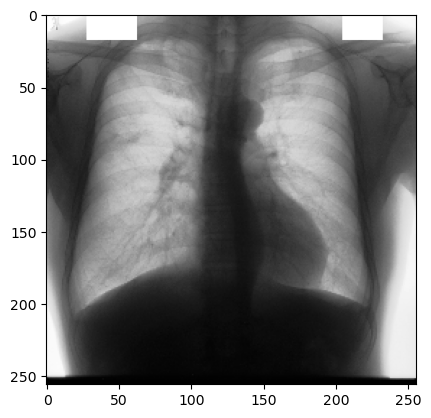

In [27]:
# load the original image
raw3d, mask = get_files_normalized(paths_train, 'heart', 'JPCLN049', (256, 256))
raw2d = raw3d[:,:,0]
plt.imshow(raw2d, cmap='gray')


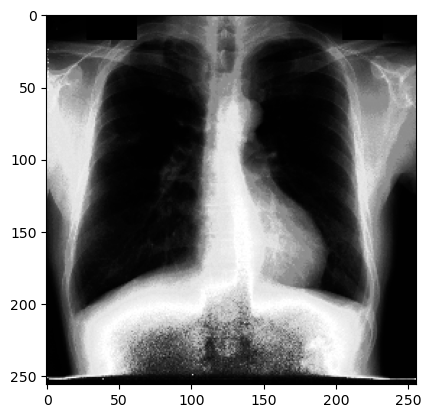

In [23]:
# call the function to map from generated dataframe to image (map_from_df)
outimg = map_from_df(raw2d, df, 'heart')
outimg = (outimg - np.min(outimg)) / (np.max(outimg) - np.min(outimg))
plt.imshow(outimg, cmap='gray')

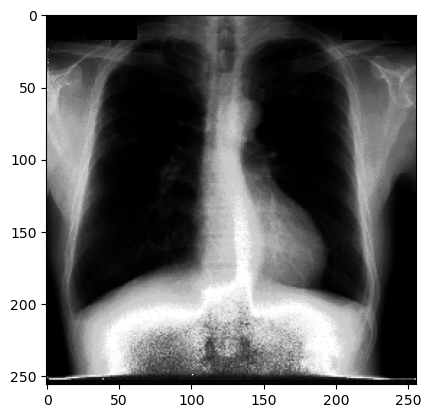

In [28]:
# alternatively, used the stored dataframe 
outimg = map_from_df(raw2d, train_df, 'heart')
outimg = (outimg - np.min(outimg)) / (np.max(outimg) - np.min(outimg))
plt.imshow(outimg, cmap='gray')